## Projeto Semestral - Segundo Semestre - ECM514 - Ciência dos Dados - API Wikipédia

Alunos:

Marcel Marques Caceres - RA: 17.00648-0

Kaique de Andrade Almeida - RA: 17.01113-2

Filipe dos Santos Pugliesi - RA: 18.02608-7

Johannes Mattheus Krouwel - RA: 20.01248-9

In [ ]:
# Obtenção de dados da Wikipédia

# https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=xml&titles=Main%20Page

In [48]:
# Conexão ao Dropbox

!pip install dropbox requests

import dropbox

# ACCESS_TOKEN = 'SEU_TOKEN_DE_ACESSO_AQUI'  # Substitua pelo seu token de acesso
ACCESS_TOKEN = ''

dbx = dropbox.Dropbox(ACCESS_TOKEN)
print("Conexão com Dropbox estabelecida.")

Conexão com Dropbox estabelecida.


In [49]:
# Função para enviar dados ao Dropbox

def upload_to_dropbox(file_path, data):
   """
   Faz o upload de um arquivo para o Dropbox.
   """
   try:
       dbx.files_upload(data.encode('utf-8'), file_path, mode=dropbox.files.WriteMode.overwrite)
       print(f"Arquivo '{file_path}' enviado com sucesso para o Dropbox.")
   except dropbox.exceptions.ApiError as e:
       print(f"Falha ao enviar '{file_path}' para o Dropbox: {e}")

In [50]:
# Lista com os títulos das páginas da Wikipédia


page_titles = [
               # Ingleses
                "Winston Churchill", "Isambard Kingdom Brunel", "Diana, Princess of Wales", "Charles Darwin",
                "William Shakespeare", "Isaac Newton", "Elizabeth I", "John Lennon",
                "Horatio Nelson, 1st Viscount Nelson", "Oliver Cromwell", "Ernest Shackleton", "James Cook",
                "Robert Baden-Powell, 1st Baron Baden-Powell", "Alfred the Great", "Arthur Wellesley, 1st Duke of Wellington", "Margaret Thatcher",
                "Michael Crawford", "Queen Victoria", "Paul McCartney", "Alexander Fleming",
                "Alan Turing", "Michael Faraday", "Owain Glyndŵr", "Elizabeth II",
                "Stephen Hawking", "William Tyndale", "Emmeline Pankhurst", "William Wilberforce",
                "David Bowie", "Guy Fawkes", "Leonard Cheshire", "Eric Morecambe",
                "David Beckham", "Thomas Paine", "Boudica", "Steve Redgrave",
                "Thomas More", "William Blake", "John Harrison", "Henry VIII",
                "Charles Dickens", "Frank Whittle", "John Peel", "John Logie Baird",
                "Aneurin Bevan", "Boy George", "Douglas Bader", "William Wallace",
                "Francis Drake", "John Wesley", "King Arthur", "Florence Nightingale",
                "T. E. Lawrence", "Robert Falcon Scott", "Enoch Powell", "Cliff Richard",
                "Alexander Graham Bell", "Freddie Mercury", "Julie Andrews", "Edward Elgar",
                "Queen Elizabeth The Queen Mother", "George Harrison", "David Attenborough", "James Connolly",
                "George Stephenson", "Charlie Chaplin", "Tony Blair", "William Caxton",
                "Bobby Moore", "Jane Austen", "William Booth", "Henry V of England",
                "Aleister Crowley", "Robert the Bruce", "Bob Geldof", "The Unknown Warrior",
                "Robbie Williams", "Edward Jenner", "David Lloyd George", "Charles Babbage",
                "Geoffrey Chaucer", "Richard III of England", "J. K. Rowling", "James Watt",
                "Richard Branson", "Bono", "John Lydon", "Bernard Montgomery",
                "Donald Campbell", "Henry II of England", "James Clerk Maxwell", "J. R. R. Tolkien",
                "Walter Raleigh", "Edward I of England", "Barnes Wallis", "Richard Burton",
                "Tony Benn", "David Livingstone", "Tim Berners-Lee", "Marie Stopes",

               # Alemães
                "Konrad Adenauer", "Martin Luther", "Karl Marx", "Sophie Scholl and Hans Scholl",
                "Willy Brandt", "Johann Sebastian Bach", "Johann Wolfgang von Goethe", "Johannes Gutenberg",
                "Otto von Bismarck", "Albert Einstein", "Adolph Kolping", "Ludwig van Beethoven",
                "Helmut Kohl", "Robert Bosch", "Daniel Küblböck", "Konrad Zuse", "Joseph Kentenich",
                "Albert Schweitzer", "Karlheinz Böhm", "Wolfgang Amadeus Mozart", "Helmut Schmidt",
                "Regine Hildebrandt", "Alice Schwarzer", "Thomas Gottschalk", "Herbert Grönemeyer",
                "Michael Schumacher", "Ludwig Erhard", "Wilhelm Röntgen", "Günther Jauch",
                "Dieter Bohlen", "Jan Ullrich", "Steffi Graf", "Samuel Hahnemann", "Dietrich Bonhoeffer",
                "Boris Becker", "Franz Beckenbauer", "Oskar Schindler", "Nena", "Hans-Dietrich Genscher",
                "Heinz Rühmann", "Harald Schmidt", "Frederick the Great", "Immanuel Kant",
                "Patrick Lindner", "Hildegard of Bingen", "Heino", "Richard von Weizsäcker",
                "Claus von Stauffenberg", "Marlene Dietrich", "Robert Koch", "Joschka Fischer",
                "Karl May", "Loriot", "Albertus Magnus", "Rudi Völler", "Heinz Erhardt",
                "Roy Black", "Heinz-Harald Frentzen", "Alexander von Humboldt", "Peter Kraus",
                "Wernher von Braun", "Dirk Nowitzki", "Campino", "Franz Josef Strauss", "Sebastian Kneipp",
                "Friedrich Schiller", "Richard Wagner", "Katarina Witt", "Fritz Walter", "Nicole",
                "Friedrich von Bodelschwingh", "Otto Lilienthal", "Marion Dönhoff", "Thomas Mann",
                "Hermann Hesse", "Romy Schneider", "Sven Hannawald", "Empress Elisabeth of Austria",
                "Willy Millowitsch", "Gerhard Schröder", "Joseph Beuys", "Friedrich Nietzsche", "Rudi Dutschke",
                "Karl Lehmann", "Beate Uhse-Rotermund", "Trümmerfrau", "Carl Friedrich Gauss", "Helmut Rahn",
                "Albrecht Dürer", "Max Schmeling", "Carl Benz", "Frederick II, Holy Roman Emperor", "Reinhard Mey", "Heinrich Heine",
                "Georg Elser", "Konrad Duden", "James Last", "Uwe Seeler",
                "Erich Gutenberg", "Emanuel Lasker", "Rudolf Steiner", "Edith Stein", "Farin Urlaub",
                "Xavier Naidoo", "Nicolaus Copernicus", "Adam Ries", "Gottlieb Daimler", "Erich Kästner",
                "Rosa Luxemburg", "Bertolt Brecht", "Theodor Heuss", "Otto the Great", "Sigmund Freud",
                "Wilhelm Busch", "Hildegard Hamm-Brücher", "Udo Lindenberg", "Eugen Drewermann", "Ferdinand Sauerbruch",
                "Peter Maffay", "Josef Frings", "Silke Fritzen", "Max Planck", "Johannes Rau",
                "Brothers Grimm", "Baron Munchausen", "Wilhelm II", "Rudolf Augstein",
                "Heinrich Böll", "Ralf Schumacher", "Anne Frank", "Frederick Barbarossa", "Sigmund Jähn",
                "Franziska van Almsick", "Clemens August Graf von Galen", "Ludwig II of Bavaria", "Carl Friedrich Zeiss",
                "Hildegard Knef", "Levi Strauss", "Sepp Herberger", "Klaus Kinski", "Werner von Siemens",
                "Ferdinand Porsche", "Peter Scholl-Latour", "August Heinrich Hoffmann von Fallersleben",
                "Siegfried & Roy", "Christoph Langen", "Michelle", "Manfred von Ardenne", "Gottfried Wilhelm Leibniz",
                "Arthur Schopenhauer", "Kurt Tucholsky", "Karl and Theo Albrecht", "Pope Benedict XVI",
                "Werner Heisenberg", "Harald Juhnke", "Till Eulenspiegel", "Götz George", "Rudolf Diesel",
                "Stefan Raab", "Hans Albers", "Nina Hagen", "Johannes Kepler", "Hans Rosenthal",
                "Rupert Neudeck", "Dieter Hildebrandt",
                "Hans Söllner", "Gregor Gysi", "Arminius", "Günter Grass", "Inge Meysel",
                "Hans Hartz", "Karl Lagerfeld", "Oliver Kahn", "Gerd Müller", "Ferdinand von Zeppelin",
                "Nicolaus Otto", "Clara Zetkin", "Hannah Arendt", "Roman Herzog",
                "Hermann Oberth", "Karl Valentin", "Frank Schöbel", "Jakob Fugger", "Henry Maske",
                "Helmut Zacharias", "Michael Ballack", "Bernhard Grzimek", "Richard Strauss", "Edmund Stoiber",
                "Klaus Störtebeker", "Peter Frankenfeld", "Mildred Scheel", "Claudia Schiffer",

               # Franceses
                "Charles De Gaulle", "Luís Pasteur", "Abade Pierre", "Marie Curie",
                "Coluche", "Victor Hugo", "Bourvil", "Molière", "Jacques Cousteau",
                "Édith Piaf", "Marcel Pagnol", "Georges Brassens", "Fernandel", "Jean de La Fontaine",
                "Jules Verne", "Napoleon", "Louis de Funès", "Jean Gabin",
                "Daniel Balavoine", "Serge Gainsbourg", "Zinedine Zidane", "Carlos Magno",
                "Lino Ventura", "François Mitterrand", "Gustave Eiffel", "Émile Zola",
                "Emmanuelle Cinquin", "Jean Moulin", "Charles Aznavour", "Yves Montand",
                "Joan of Arc", "Philippe Leclerc de Hauteclocque", "Voltaire", "Johnny Hallyday",
                "Antoine de Saint-Exupéry", "Claude François", "Christian Cabrol", "Jean-Paul Belmondo",
                "Jules Ferry", "Louis Lumière", "Michel Platini", "Jacques Chirac",
                "Charles Trenet", "Georges Pompidou", "Michel Sardou", "Simone Signoret",
                "Haroun Tazieff", "Jacques Prévert", "Éric Tabarly", "Louis XIV",
                "David Douillet", "Henri Salvador", "Jean-Jacques Goldman", "Jean Jaurès",
                "Jean Marais", "Yannick Noah", "Albert Camus", "Dalida", "Léon Zitrone",
                "Nicolas Hulot", "Simone Veil", "Alain Delon", "Patrick Poivre d'Arvor",
                "Aimé Jacquet", "Francis Cabrel", "Brigitte Bardot", "Guy de Maupassant",
                "Alexandre Dumas", "Honoré de Balzac", "Paul Verlaine",
                "Jean-Jacques Rousseau", "Maximilien Robespierre", "Renaud",
                "Bernard Kouchner", "Claude Monet", "Michel Serrault", "Pierre-Auguste Renoir",
                "Michel Drucker", "Raimu", "Vercingetorix", "Raymond Poulidor",
                "Charles Baudelaire", "Pierre Corneille", "Arthur Rimbaud", "Georges Clemenceau",
                "Gilbert Bécaud", "José Bové", "Jean Ferrat", "Lionel Jospin",
                "Jean Cocteau", "Luc Besson", "Tino Rossi", "Pierre de Coubertin",
                "Jean Renoir", "Gérard Philipe", "Jean-Paul Sartre", "Catherine Deneuve",
                "Serge Reggiani", "Gérard Depardieu", "Françoise Dolto", "René Descartes",
                "Blaise Pascal",

               # Americanos
                "Muhammad Ali", "Maya Angelou", "Susan B. Anthony", "Lance Armstrong", "Neil Armstrong",
                "Lucille Ball", "Alexander Graham Bell", "Barbara Bush", "George H. W. Bush", "George W. Bush",
                "Laura Bush", "Andrew Carnegie", "Johnny Carson", "Jimmy Carter", "George Washington Carver",
                "Ray Charles", "Cesar Chavez", "Bill Clinton", "Hillary Clinton", "Bill Cosby",
                "Tom Cruise", "Ellen DeGeneres", "Walt Disney", "Frederick Douglass", "Amelia Earhart",
                "Clint Eastwood", "Thomas Edison", "John Edwards", "Albert Einstein", "Dwight D. Eisenhower",
                "Brett Favre", "Henry Ford", "Benjamin Franklin", "Bill Gates", "Mel Gibson",
                "Rudy Giuliani", "John Glenn", "Billy Graham", "Alexander Hamilton", "Tom Hanks",
                "Hugh Hefner", "Katharine Hepburn", "Bob Hope", "Howard Hughes", "Michael Jackson",
                "Thomas Jefferson", "Steve Jobs", "Lyndon B. Johnson", "Michael Jordan", "Helen Keller",
                "Jacqueline Kennedy Onassis", "John F. Kennedy", "Robert F. Kennedy", "Martin Luther King Jr.",
                "Rush Limbaugh", "Abraham Lincoln", "Charles Lindbergh", "George Lucas", "Madonna",
                "Malcolm X", "Phil McGraw", "Marilyn Monroe", "Michael Moore", "Audie Murphy",
                "Richard Nixon", "Barack Obama", "Jesse Owens", "Rosa Parks", "George S. Patton",
                "Colin Powell", "Elvis Presley", "Ronald Reagan", "Christopher Reeve", "Condoleezza Rice",
                "Jackie Robinson", "Eleanor Roosevelt", "Franklin D. Roosevelt", "Theodore Roosevelt",
                "Babe Ruth", "Carl Sagan", "Jonas Salk", "Arnold Schwarzenegger", "Frank Sinatra",
                "Joseph Smith", "Steven Spielberg", "James Stewart", "Martha Stewart", "Nikola Tesla",
                "Pat Tillman", "Harry S. Truman", "Donald Trump", "Harriet Tubman", "Mark Twain",
                "Sam Walton", "George Washington", "John Wayne", "Oprah Winfrey", "Tiger Woods",
                "Wright brothers", "Chuck Yeager",

               # Portugueses
                "António de Oliveira Salazar", "Álvaro Cunhal", "Aristides de Sousa Mendes", "Afonso I of Portugal",
                "Luís de Camões", "John II of Portugal", "Prince Henry the Navigator", "Fernando Pessoa",
                "Sebastião José de Carvalho e Melo, 1st Marquis of Pombal", "Vasco da Gama", "Salgueiro Maia",
                "Mário Soares", "Anthony of Padua", "Amália Rodrigues", "Eusébio", "Francisco Sá Carneiro",
                "Jorge Nuno Pinto da Costa", "Nuno Álvares Pereira", "João Ferreira de Almeida", "José Mourinho",
                "Agostinho da Silva", "Eça de Queiroz", "António Egas Moniz", "Denis of Portugal", "Fernando Nobre",
                "José Hermano Saraiva", "Aníbal Cavaco Silva", "Humberto Delgado", "José Afonso", "Luís Figo",
                "Marcelo Caetano", "Pedro Nunes", "António Vieira", "Florbela Espanca", "Ferdinand Magellan",
                "Maria de Lourdes Pintasilgo", "John I of Portugal", "Sophia de Mello Breyner Andresen", "Antonia Ferreira",
                "Antonio Damasio", "Afonso de Albuquerque", "Manuel I of Portugal", "José Saramago", "Elizabeth of Portugal",
                "Catarina Eufémia", "Carlos Paredes", "José Sócrates", "Pedro Álvares Cabral", "Ruy de Carvalho",
                "Brites de Almeida, The Baker of Aljubarrota", "Alberto João Jardim", "Almada Negreiros", "Vasco Gonçalves",
                "Álvaro Siza Vieira", "Belmiro de Azevedo", "José Tomás de Sousa Martins", "Maria do Carmo Seabra", "Carlos I of Portugal",
                "Mariza", "Eleanor of Portugal", "Rosa Mota", "Afonso III of Portugal", "Vítor Baía", "Bartolomeu Dias",
                "Otelo Saraiva de Carvalho", "Cristiano Ronaldo", "Herman José", "Maria II of Portugal", "Carlos Lopes",
                "Afonso Costa", "Fontes Pereira de Melo", "Gago Coutinho", "Ricardo Araújo Pereira", "Bocage",
                "Hélio Pestana", "Jorge Sampaio", "António Champalimaud", "António Lobo Antunes", "Gil Vicente",
                "Maria Helena Vieira da Silva", "Miguel Torga", "Natália Correia", "Edgar Cardoso", "Fernão Mendes Pinto",
                "Sister Lúcia", "Pope John XXI", "Damião de Góis", "John IV of Portugal", "Joaquim Agostinho", "Adelaide Cabete",
                "Almeida Garrett", "António Variações", "Paula Rego", "Maria João Pires",

               # Argentinos
                "José de San Martín", "René Favaloro", "Juan Manuel Fangio", "Alberto Olmedo",
                "Che Guevara", "Diego Maradona", "Eva Perón", "Jorge Luis Borges", "Manuel Belgrano",
                "Roberto Fontanarrosa", "Adolfo Bioy Casares", "Adolfo Pérez Esquivel", "Alfonsina Storni",
                "Alfredo Alcón", "Alfredo Di Stéfano", "Alfredo Palacios", "Alicia Moreau de Justo",
                "Ángel Vicente Peñaloza", "Antonio Berni", "Arturo Frondizi", "Arturo Umberto Illia",
                "Astor Piazzolla", "Atahualpa Yupanqui", "Bartolomé Mitre", "Benito Quinquela Martín",
                "Bernardino Rivadavia", "Bernardo Houssay", "Calfucurá", "Carlos Bilardo", "Carlos Gardel",
                "Carlos Menem", "Carlos Monzón", "Carlos Mugica", "Carlos Reutemann", "Charly García",
                "César Luis Menotti", "César Milstein", "Daniel Passarella", "Domingo Faustino Sarmiento",
                "Enrique Angelelli", "Enrique Santos Discépolo", "Ernesto Sabato", "Esteban Echeverría",
                "Estela de Carlotto", "Facundo Quiroga", "Florentino Ameghino", "Francisco Moreno",
                "Gabriel Batistuta", "Gabriela Sabatini", "Guillermo Vilas", "Gustavo Santaolalla",
                "Hebe de Bonafini", "Hipólito Yrigoyen", "Hugo Porta", "Jorge Newbery", "José Hernández",
                "José María Gatica", "Juan Bautista Alberdi", "Juan José Castelli", "Juan Manuel de Rosas",
                "Juan Perón", "Juana Azurduy de Padilla", "Julio Argentino Roca", "Julio Bocca",
                "Julio Cortázar", "Justo José de Urquiza", "Leandro N. Alem", "León Gieco",
                "Lisandro de la Torre", "Lola Mora", "Luciana Aymar", "Luis Federico Leloir", "Luis Sandrini",
                "Manu Ginóbili", "Manuel Dorrego", "Mariano Moreno", "Mariano Mores", "Mario Kempes",
                "Mariquita Sánchez", "Martín Miguel de Güemes", "María Elena Walsh", "Mercedes Sosa",
                "Nicolino Locche", "Niní Marshall", "Norma Aleandro", "Néstor Kirchner", "Oscar Bonavena",
                "Quino", "Ramón Carrillo", "Raúl Alfonsín", "Ricardo Balbín", "Roberto Arlt", "Roberto De Vicenzo",
                "Rodolfo Walsh", "Roque Sáenz Peña", "Salvador Mazza", "Sandro de América", "Tato Bores",
                "Tita Merello", "Xul Solar",

               # Italianos
                "Lucio Battisti", "Roberto Benigni", "Mike Bongiorno", "Caravaggio", "Giosuè Carducci", "Christopher Columbus",
                "Fausto Coppi", "Dante Alighieri", "Leonardo da Vinci", "Eduardo De Filippo", "Vittorio De Sica", "Falcone", "Borsellino",
                "Federico Fellini", "Enrico Fermi", "Chiara Ferragni", "Enzo Ferrari", "Rosario Fiorello", "Galileo Galilei",
                "Giuseppe Garibaldi", "Vittorio Gassman", "Giotto", "Giacomo Leopardi", "Rita Levi-Montalcini", "Sophia Loren",
                "Anna Magnani", "Nino Manfredi", "Alessandro Manzoni", "Guglielmo Marconi", "Marcello Mastroianni", "Giuseppe Mazzini",
                "Michelangelo", "Mina", "Aldo Moro", "Giovanni Pascoli", "Laura Pausini", "Luciano Pavarotti", "Sandro Pertini",
                "Petrarch", "Luigi Pirandello", "Marco Polo", "Giacomo Puccini", "Valentino Rossi", "Alberto Sordi",
                "Totò", "Massimo Troisi", "Giuseppe Verdi", "Alessandro Volta",

               # Brasileiros
                "Ayrton Senna", "Chico Xavier", "Fernando Henrique Cardoso", "Getúlio Vargas", "Irmã Dulce",
                "Juscelino Kubitschek", "Luiz Inácio Lula da Silva", "Oscar Niemeyer", "Pelé", "Isabel, Princess Imperial of Brazil",
                "Alberto Santos-Dumont", "Tiradentes", "Edir Macedo", "Chico Anysio", "Ronaldo (Brazilian footballer)", "Dercy Gonçalves", "Zilda Arns",
                "Roberto Carlos (singer)", "José Alencar", "Neymar", "Eike Batista", "Ruy Barbosa",
                "Frei Galvão", "Manoel Jacintho Coelho", "Oswaldo Cruz", "Silas Malafaia", "Pedro II of Brazil",
                "Chico Mendes", "Luiz Gonzaga", "Renato Russo", "Herbert de Souza", "Padre Cícero",
                "Dilma Rousseff", "Tancredo Neves", "Luciano Huck", "Valdemiro Santiago", "Hélder Câmara",
                "Renato Aragão", "Rodrigo Faro", "Xuxa", "Machado de Assis", "Luan Santana",
                "Ivete Sangalo", "Elis Regina", "Irineu Evangelista de Sousa, Viscount of Mauá", "Raul Seixas", "Leonel Brizola",
                "Tiririca", "Gugu Liberato", "Rogério Ceni", "Carlos Drummond de Andrade",
                "Zumbi", "R.R. Soares", "Paulo Freire", "Hebe Camargo", "Monteiro Lobato",
                "Roberto Marinho", "Marcos (footballer, born 1973)", "Marcelo Rossi", "Zico (footballer)", "Amácio Mazzaropi",
                "Dedé (footballer, born 1988)", "Ulysses Guimarães", "Reynaldo Gianecchini", "Carlos Chagas", "Jonas Abib",
                "Luís Alves de Lima e Silva, Duke of Caxias", "Antônio Ermírio de Moraes", "Cândido Rondon", "Lua Blanco", "Michel Teló",
                "Garrincha", "Lampião", "Claudia Leitte", "Luís Carlos Prestes", "Marcos Pontes",
                "Fernando Collor de Mello", "José Serra", "Sócrates", "Datena", "Ronaldinho",
                "Joelma (singer)", "Chico Buarque", "Chacrinha", "Amado Batista", "William Bonner (newscaster)",
                "Cazuza", "Antônio Carlos Jobim", "Anderson Silva", "Roberto Landell de Moura", "Romário",
                "Jorge Amado", "Ronald Golias", "Itamar Franco", "Roberto Justus", "Ana Paula Valadão",
                "Vital Brazil", "Jô Soares", "Maria da Penha"

               ]

len(page_titles)

836

In [46]:
# Extração de páginas da Wikipédia

import requests

def get_wikipedia_page_content(page_title):
    """
    Extrai o conteúdo da página da Wikipédia pelo título da página.
    """
    url = "https://en.wikipedia.org/w/api.php"

    params = {
        'action': 'query',
        'format': 'json',
        'prop': 'extracts',
        'explaintext': True,
        'titles': page_title
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        page = next(iter(data['query']['pages'].values()))
        content = page.get('extract', 'No content found')
        return content
    else:
        print(f"Erro ao acessar a API da Wikipedia para '{page_title}'. Status code: {response.status_code}")
        return None

def get_contents_from_page_list(page_titles):
    """
    Extrai o conteúdo de uma lista de páginas da Wikipédia e salva cada conteúdo no Dropbox.
    """
    for title in page_titles:
        print(f"Extraindo conteúdo para: {title}")
        content = get_wikipedia_page_content(title)
        if content:
            # Define o caminho do arquivo no Dropbox
            safe_title = title.replace(' ', '_')
            file_path = f"/wikipedia-api-biografias/{safe_title}.txt"

            # Faz o upload do conteúdo para o Dropbox
            upload_to_dropbox(file_path, content)
        else:
            print(f"Conteúdo para '{title}' não encontrado.")


# Função para execução da extração e upload
get_contents_from_page_list(page_titles)

# Contar número de páginas
len(page_titles)

Extraindo conteúdo para: Winston Churchill
Arquivo '/wikipedia-api-biografias/Winston_Churchill.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: Isambard Kingdom Brunel
Arquivo '/wikipedia-api-biografias/Isambard_Kingdom_Brunel.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: Diana, Princess of Wales
Arquivo '/wikipedia-api-biografias/Diana,_Princess_of_Wales.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: Charles Darwin
Arquivo '/wikipedia-api-biografias/Charles_Darwin.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: William Shakespeare
Arquivo '/wikipedia-api-biografias/William_Shakespeare.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: Isaac Newton
Arquivo '/wikipedia-api-biografias/Isaac_Newton.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: Elizabeth I
Arquivo '/wikipedia-api-biografias/Elizabeth_I.txt' enviado com sucesso para o Dropbox.
Extraindo conteúdo para: John Lennon
Ar

836

In [55]:
# Conexão ao Dropbox
!pip install dropbox requests tensorflow tensorflow-hub

import dropbox
import tensorflow_hub as hub
import tensorflow as tf
import pandas as pd
import re
import json

# Token de acesso do Dropbox
ACCESS_TOKEN = '' # Insira seu token aqui
dbx = dropbox.Dropbox(ACCESS_TOKEN)
print("Conexão com Dropbox estabelecida.")


Conexão com Dropbox estabelecida.


In [56]:
import dropbox

# Listar diretórios no nível raiz
try:
    res = dbx.files_list_folder(path="")
    for entry in res.entries:
        print(entry.name)
except dropbox.exceptions.ApiError as e:
    print("Erro ao acessar a pasta raiz:", e)



wikipedia-api-biografias


In [70]:
import dropbox

def carregar_primeiros_400_arquivos_dropbox(caminho_dropbox):

    try:
        res = dbx.files_list_folder(caminho_dropbox)

        # Filtra os primeiros 400 arquivos
        arquivos = [
            entry.path_lower for entry in res.entries
            if isinstance(entry, dropbox.files.FileMetadata)
        ][:400]  # Limita a lista aos 400 primeiros arquivos

        textos = []
        for arquivo in arquivos:
            try:
                _, res = dbx.files_download(arquivo)
                textos.append(res.content.decode("utf-8"))
            except Exception as e:
                print(f"Erro ao baixar '{arquivo}': {e}")
        return textos

    except dropbox.exceptions.ApiError as e:
        print(f"Erro ao listar arquivos no diretório '{caminho_dropbox}': {e}")
        return []

# Carregar os primeiros 400 arquivos
caminho_dropbox = '/wikipedia-api-biografias'  # Insira o caminho correto do diretório
textos = carregar_primeiros_50_arquivos_dropbox(caminho_dropbox)

# Confirmar a quantidade de textos carregados
print(f"Total de arquivos carregados: {len(textos)}")




Total de arquivos carregados: 400


In [82]:
# Exibe o início do primeiro arquivo carregado
primeiro_arquivo = textos[0]  # Obtém o conteúdo do primeiro arquivo
print("Primeiro trecho do primeiro arquivo:\n")
print(primeiro_arquivo[:500])  # Exibe os primeiros 500 caracteres


Primeiro trecho do primeiro arquivo:

Sir Winston Leonard Spencer Churchill  (30 November 1874 – 24 January 1965) was a British statesman, military officer, and writer who was Prime Minister of the United Kingdom from 1940 to 1945 (during the Second World War) and again from 1951 to 1955. Apart from 1922 to 1924, he was a member of Parliament (MP) from 1900 to 1964 and represented a total of five constituencies. Ideologically an adherent to economic liberalism and imperialism, he was for most of his career a member of the Conservati


In [117]:
ultimo_arquivo = textos[-1]  # Obtém o conteúdo do último arquivo
print("Primeiro trecho do último arquivo:\n")
print(ultimo_arquivo[:500])  # Exibe os primeiros 500 caracteres

Primeiro trecho do último arquivo:

Richard Milhous Nixon (January 9, 1913 – April 22, 1994) was the 37th president of the United States, serving from 1969 until his resignation in 1974. A member of the Republican Party, he previously served as a representative and senator from California and as the 36th vice president from 1953 to 1961 under President Dwight D. Eisenhower. His presidency saw the reduction of U.S. involvement in the Vietnam War, détente with the Soviet Union and China, the Apollo 11 Moon landing, and the establish


In [90]:
# Carregar o modelo de embedding
modelo_embedding = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def gerar_embedding(texto):
    return modelo_embedding([texto]).numpy()

# Aplicar embeddings
embeddings = [gerar_embedding(texto) for texto in textos]


In [113]:
def extrair_informacoes(texto):
    info = {}

    # Exemplo: usar expressões regulares para extrair país, profissão e gênero
    # Para o gênero, vamos considerar "man" ou "woman" como indicativos
    info['país'] = re.search(r"País: (\w+)", texto).group(1) if re.search(r"País: (\w+)", texto) else ""
    info['profissão'] = re.findall(r"Profissão: (\w+)", texto)
    info['gênero'] = 'Feminino' if 'woman' in texto.lower() else 'Masculino'

    return info

# Processar todos os textos para extrair informações
informacoes = [extrair_informacoes(texto) for texto in textos]
df_informacoes = pd.DataFrame(informacoes)





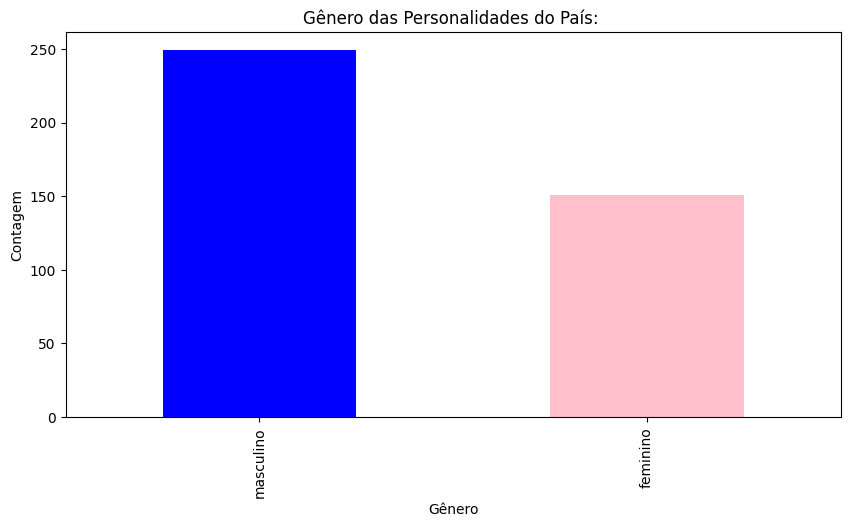

In [114]:
import matplotlib.pyplot as plt

# Normalizando os valores de gênero
df_informacoes['gênero'] = df_informacoes['gênero'].str.lower().str.strip()

# Contagem por país e gênero com dados normalizados
contagem_pais = df_informacoes['país'].value_counts()
contagem_genero = df_informacoes.groupby('país')['gênero'].value_counts()
contagem_profissao = df_informacoes.groupby('país')['profissão'].apply(lambda prof: prof.explode().value_counts())

# Gráfico por país
for pais in contagem_pais.index:
    plt.figure(figsize=(10, 5))

    # Gráfico de gênero
    if pais in contagem_genero:
        contagem_genero[pais].plot(kind='bar', title=f"Gênero das Personalidades do País: {pais}", color=['blue', 'pink'])
        plt.xlabel("Gênero")
        plt.ylabel("Contagem")
        plt.show()

    # Gráfico de profissão
    if pais in contagem_profissao:
        contagem_profissao[pais].plot(kind='bar', title=f"Profissões em {pais}", color='purple')
        plt.xlabel("Profissão")
        plt.ylabel("Contagem")
        plt.show()

